# Computational Social Science Project #2 

**Enter your Name:**Nereida Heller

*Semester:* Fall 2024


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send me a pull request on GitHub flagging the syntax that's tripping you up 

**INSTRUCTIONS:** For this project, copy all of the files in the Project 2 folder in the course repo into a "Project 2" subfolder within the "Computational Social Science Projects" directory that you created for the first project. You will work on the project locally, push your project to GitHub, and submit a link to the GitHub repo on bCourses by the project deadline. Be sure the final submission is in the main branch, which is what I'll pull down and re-run to grade. 

## 1. Introduction/Setup

#### a) Import relevant libraries
Here are some libraries you will need to get started. Along the way you may need to add more. Best practice is to add them here at the top of the script.

In [1]:
#
# import libraries you might need here 
#-----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


# use random seed for consistent results 
np.random.seed(273)

#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. Read in the data contained in the projoect folder: "Diabetes with Population Info by County 2017.csv".

In [2]:
pwd

'C:\\git\\Computational-Social-Science-Projects\\Project 2'

In [3]:
#
# read in and inspect data frame
#-----------
# Note that "CountyFips" needs to be a string so the leading 0 isn't dropped (only if you want to make choropleth map) 
diabetes = pd.read_csv("data prep/Diabetes with Population Info by County 2017.csv", 
                       dtype={"CountyFIPS": str}) 
diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,01001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,01003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,01005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,01007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,01009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [4]:
diabetes.tail()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
3215,Sweetwater County,Wyoming,56037,2560,9362,7518,92.0,44117,43226,891,...,30491,6159,4721,32308,16800,15508,108.3,4721,2262,2459
3216,Teton County,Wyoming,56039,439,2051,2005,94.8,23059,22875,184,...,18169,3843,3135,18625,9619,9006,106.8,3135,1526,1609
3217,Uinta County,Wyoming,56041,1440,4925,3519,97.6,20609,19891,718,...,13939,3251,2498,14538,7280,7258,100.3,2498,1234,1264
3218,Washakie County,Wyoming,56043,637,1738,1708,89.0,8129,7791,338,...,5951,2041,1686,6187,3142,3045,103.2,1686,794,892
3219,Weston County,Wyoming,56045,601,2015,1383,90.6,7100,6956,144,...,5434,1770,1340,5595,2923,2672,109.4,1340,637,703


In [5]:
#
# look at shape
#-----------
# look at the dimensions of the diabetes data frame
print('shape: ', diabetes.shape) 

shape:  (3220, 95)


In [6]:
#
# set pandas parameters
#-----------
# tells pandas how many rows to display when printing so results don't get truncated
pd.set_option('display.max_rows', 100)

# look at the data types for each column in diabetes df (likely be located under each row bc column names are long)
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [7]:
#
# identify non-numeric features
#-----------
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes["Diabetes_Number"].str.isnumeric()]["Diabetes_Number"].unique()) 

['Suppressed']


In [8]:
#
# Now do the same as above, but for "Obesity_Number"
#-----------
print(diabetes[~diabetes["Obesity_Number"].str.isnumeric()]["Obesity_Number"].unique()) 


['No Data']


In [9]:
#
# Now do the same as above, but for "Physical_Inactivity_Number" 
#-----------
print(diabetes[~diabetes["Physical_Inactivity_Number"].str.isnumeric()]["Physical_Inactivity_Number"].unique()) 


['No Data']


These values ("Suppresssed" and "No Data") contained in the two respective columns are coercing these features to objects instead of them being  integers. Let's drop those rows in the next section, and also recode "Physical_Inactivity_Number" feature to be an integer.

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' too (you'll have to scroll all the way over to the right).

In [10]:
#before
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

In [11]:
#
# Recode variables
#-----------

# Diabetes
# ----------
# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
# note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"] 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype(int) 

# Obesity
# ----------
#dropping "No Data" columns
diabetes = diabetes[diabetes['Obesity_Number']!="No Data"] 

#convert to int
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype(int) 

# Physical Inactivity
# ----------
#dropping "No Data" columns
diabetes = diabetes[diabetes['Physical_Inactivity_Number']!="No Data"] 

#convert to int
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype(int) 

# Some final changes 
# ----------
# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]

# change to numeric from string, since it originally included the "-", which made it a string
# you'll have to decide whether to make it integer or float 
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype(float)

In [12]:
#after
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                           int32
Obesity_Number                                                                                                                                            int32
Physical_Inactivity_Number                                                                                                                                int32
sex and age_total population

We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [13]:
#
# Scale to county populations (express as percentage of county total population)
#-----------

# select count variables to recode to percentages; make sure we leave out ratios and our population variable 
# because these don't make sense to scale by population
#It also doesn't make sense to scale the median age column so not scaling that
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population','sex and age_total population_median age (years)']]
           
# recode all selected columns to numeric
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce') 

# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)

Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [14]:
diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,01001,0.093804,0.244366,0.226902,76.5,55200,0.981341,0.018659,...,0.717645,0.170344,0.145833,0.757808,0.363297,0.394511,92.1,0.145833,0.063188,0.082645
1,Baldwin County,Alabama,01003,0.080281,0.233255,0.192324,86.6,208107,0.982836,0.017164,...,0.747221,0.239353,0.195404,0.780512,0.375307,0.405205,92.6,0.195404,0.090675,0.104730
2,Barbour County,Alabama,01005,0.131875,0.310643,0.210651,76.2,25782,0.986308,0.013692,...,0.752230,0.219455,0.179738,0.789155,0.423668,0.365488,115.9,0.179738,0.077729,0.102009
3,Bibb County,Alabama,01007,0.105251,0.290052,0.258667,80.5,22527,0.991699,0.008301,...,0.748613,0.191903,0.162516,0.793182,0.425179,0.368003,115.5,0.162516,0.072491,0.090025
4,Blount County,Alabama,01009,0.108977,0.246804,0.249198,79.7,57645,0.983780,0.016220,...,0.732622,0.215110,0.177518,0.766363,0.374621,0.391743,95.6,0.177518,0.078758,0.098760


In [15]:
#
# check
#-----------
# set pandas options
pd.set_option('display.max_columns', None)

# inspect recoded values
diabetes_summary = diabetes.describe().transpose() # note we use the transpose method rather than .T because this object is not a numpy array

#(exporting for understanding)
#diabetes.to_csv("diabetes_data_mod.csv", index=False)
  
# check recoding 
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[ : ,[0,1,3,7]]) # select which columns in the summary table we want to present

,count,mean,min,max
Diabetes_Number,3112.0,0.092857,0.019038,2.242079e-01
Obesity_Number,3112.0,0.251666,0.088946,4.767883e-01
Physical_Inactivity_Number,3112.0,0.200861,0.064949,3.922853e-01
sex and age_total population_65 years and over_sex ratio (males per 100 females),3112.0,84.275643,34.700000,2.200000e+02
race_total population,3112.0,103682.624036,228.000000,1.009805e+07
race_total population_one race,3112.0,0.976059,0.713126,1.000000e+00
race_total population_two or more races,3112.0,0.023941,0.000000,2.868743e-01
race_total population_one race_1,3112.0,0.976059,0.713126,1.000000e+00
race_total population_one race_white,3112.0,0.831107,0.038912,1.000000e+00
race_total population_one race_black or african american,3112.0,0.090215,0.000000,8.741228e-01


#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. Note that Pandas will not allow them to have the same exact column name, so they will likely be distinct on column name but will be copies otherwise.

In [16]:
# Check for duplicate columns
#-----------
# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


['race_total population_two or more races_1',
 'sex and age_total population',
 'sex and age_total population_18 years and over_1',
 'hispanic or latino and race_total population',
 'sex and age_total population_65 years and over_1',
 'race_total population_one race_1']

In [17]:
#
# drop columns from duplicates list
#-----------
# "Sum of race alone or in combination with one or more other races_total population"
# was the same as "race_total population" so it's all ones, just like "sex and age_total population" should it also be dropped?
# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns=['race_total population_one race_1', 'sex and age_total population','sex and age_total population_18 years and over_1','race_total population_two or more races_1','hispanic or latino and race_total population','sex and age_total population_65 years and over_1'])

Finally, there are many states accounted for the in dataset. If we convert this column to a categorical variable, and create dummies, it will create a rather sparse matrix (many 0s in our dataset) becuase there will be 49 dummy variables. One alternative is to classify each state to a larger US region and use that variable instead of state. The following code will do that.

In [18]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'Southeast',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Southeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Add a new 'Region' column based on the mapping
diabetes['Region'] = diabetes['State'].map(state_to_region)

# Print to verify'Region' column has been added
diabetes


,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some

## 2. Exploratory Data Analysis

Make at least two figures (feel free to make more) and explain their relevance to the scientific problem. The goal here is to uncover interesting patterns in the data, learn more about the scope of the problem, and communicate these findings to your audience in clear ways.

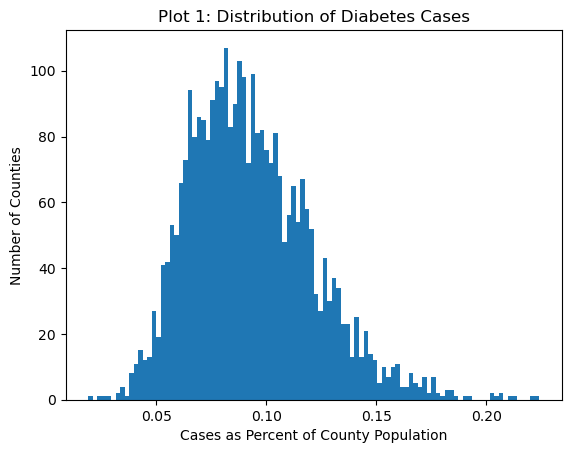

In [19]:
# kind of silly to do this without a robust data dictionary? would be really helpful (/crucial) to understand 
# how the variables are constructed and what they mean. But ok. 
#
# histogram to see the distribution of diabetes cases as percentage of county population
plt.clf() 
plt.title('Plot 1: Distribution of Diabetes Cases')
plt.xlabel('Cases as Percent of County Population')
plt.hist(diabetes['Diabetes_Number'], bins=100) 
plt.ylabel('Number of Counties')
plt.show();


Starting with a histogram showing the distribution of Diabetes_Number, which we converted to be diabetes cases as percentage of county population.


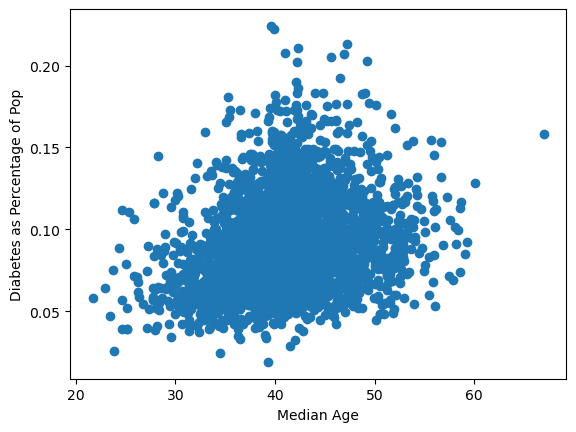

In [20]:
#Scatterplot on median age

plt.scatter(diabetes['sex and age_total population_median age (years)'], diabetes['Diabetes_Number']);

# Add labels and title
plt.xlabel('Median Age')
plt.ylabel('Diabetes as Percentage of Pop')

# Show the plot
#plt.grid()
plt.show()

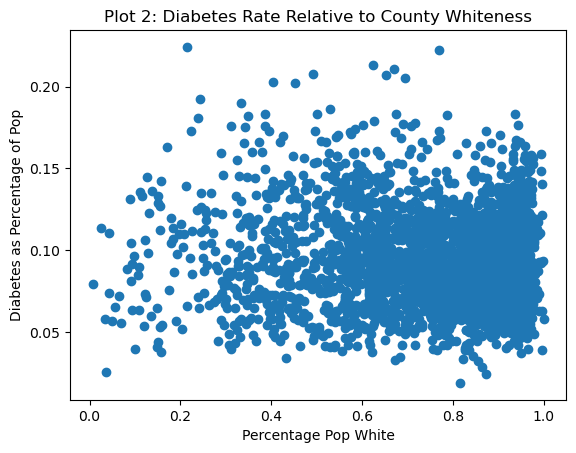

In [21]:
#
# EDA #2 and interpretations in this section 
#-----------
# curious about distributions by race... 
#
# formatting with a subset of race vars that add up to 1
#
# # EDA #2 and interpretations in this section 
# #-----------
# # curious about distributions by race... 
# #

# diabetes_race = diabetes[['Diabetes_Number',
#                           'race_total population_one race_white', 
#                           'race_total population_one race_black or african american', 
#                           'race_total population_one race_american indian and alaska native',
#                           'race_total population_one race_asian',
#                           'race_total population_one race_native hawaiian and other pacific islander',
#                           'hispanic or latino and race_total population_hispanic or latino (of any race)',
#                           'race_total population_two or more races'
#                          ]]


# diabetes_race.columns = ['Diabetes_Number',
#                          'White', 
#                          'Black/African American', 
#                          'American Indian or Alaskan Native', 
#                          'Asian', 
#                          'Native Hawaiian or Other PI', 
#                          'Hispanic/Latin@', 
#                          'Two or More Races'
#                         ]

diabetes_racecat = diabetes[['Diabetes_Number',
                          'hispanic or latino and race_total population_hispanic or latino (of any race)',
                          'hispanic or latino and race_total population_not hispanic or latino_white alone',
                          'hispanic or latino and race_total population_not hispanic or latino_black or african american alone',
                          'hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone',
                          'hispanic or latino and race_total population_not hispanic or latino_asian alone',
                          'hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone',
                          'hispanic or latino and race_total population_not hispanic or latino_some other race alone',
                          'hispanic or latino and race_total population_not hispanic or latino_two or more races',
                         ]]


diabetes_racecat.columns = ['Diabetes_Number',
                         'Hispanic or Latino',
                         'White', 
                         'Black/African American', 
                         'American Indian or Alaskan Native', 
                         'Asian', 
                         'Native Hawaiian or Other PI', 
                         'Other Race', 
                         'Two or More Races'
                        ]

# Create a scatter plot

plt.scatter(diabetes_racecat['White'], diabetes_racecat['Diabetes_Number']);

# Add labels and title
plt.xlabel('Percentage Pop White')
plt.ylabel('Diabetes as Percentage of Pop')
plt.title('Plot 2: Diabetes Rate Relative to County Whiteness')

# Show the plot
#plt.grid()
plt.show()


In [22]:
#racial distribution
print(diabetes_racecat.mean())

#what are the mean race percentages for counties with high diabetes incidence? 
print(diabetes_racecat.loc[diabetes_racecat['Diabetes_Number'] > 0.2].mean())



Diabetes_Number                      0.092857
Hispanic or Latino                   0.093201
White                                0.765065
Black/African American               0.088817
American Indian or Alaskan Native    0.018016
Asian                                0.013534
Native Hawaiian or Other PI          0.000780
Other Race                           0.001097
Two or More Races                    0.019489
dtype: float64
Diabetes_Number                      0.210560
Hispanic or Latino                   0.028263
White                                0.552626
Black/African American               0.369051
American Indian or Alaskan Native    0.019668
Asian                                0.003464
Native Hawaiian or Other PI          0.000316
Other Race                           0.000215
Two or More Races                    0.026396
dtype: float64


There's a huge spike in Black population in these particular counties. It also looks like the mean % white is a _lot_ lower for the counties with the highest incidences of diabetes. 

In [23]:
# Function for whiteness, best I can think of to do right now
def whiteness_score(White):
    if White >= .8:
        return 5 #Majority White
    elif White >= .6:
        return 4 #Mostly White
    elif White >= .4:
        return 3 #Mixed White and Non-White
    elif White >= .2:
        return 2 #Mostly Non-White
    else:
        return 1 #Majority non-white


#add to race df. again a warning here, I guess it's going to do this whenever I add a column this way. 
###############################Is there a different practice that would be better/not give a warning?#############################
diabetes_racecat['Whiteness'] = diabetes_racecat['White'].apply(whiteness_score)

diabetes_racecat

C:\Users\mackgsr1nvivo\AppData\Local\Temp\ipykernel_43512\2719470413.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_racecat['Whiteness'] = diabetes_racecat['White'].apply(whiteness_score)


,Diabetes_Number,Hispanic or Latino,White,Black/African American,American Indian or Alaskan Native,Asian,Native Hawaiian or Other PI,Other Race,Two or More Races,Whiteness
0,0.093804,0.027681,0.750217,0.189764,0.002880,0.010290,0.000091,0.000743,0.018333,4
1,0.080281,0.044943,0.830188,0.093841,0.006718,0.008015,0.000043,0.001970,0.014281,5
2,0.131875,0.042898,0.461485,0.473160,0.002444,0.003297,0.000039,0.003336,0.013343,3
3,0.105251,0.024282,0.745816,0.220802,0.000355,0.001642,0.000000,0.000000,0.007103,4
4,0.108977,0.091266,0.871403,0.014225,0.002151,0.003435,0.000312,0.003018,0.014190,5
...,...,...,...,...,...,...,...,...,...,...
3215,0.058028,0.159621,0.795770,0.007616,0.010699,0.006324,0.004397,0.000249,0.015323,4
3216,0.019038,0.148879,0.815864,0.010625,0.003339,0.012229,0.001518,0.000520,0.007025,5
3217,0.069872,0.091416,0.875443,0.000970,0.007278,0.001067,0.000000,0.000000,0.023825,5
3218,0.078361,0.141838,0.820027,0.000123,0.003567,0.000000,0.000000,0.001599,0.032845,5


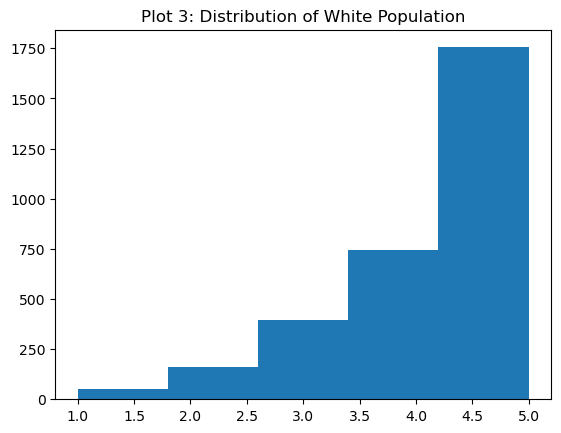

In [24]:
# clear figure
plt.clf()
plt.hist(diabetes_racecat['Whiteness'], bins=5) 
plt.title('Plot 3: Distribution of White Population')
# plot Whiteness of counties
plt.show()

In [25]:

#getting means across counties 
diabetes_race_means = diabetes_racecat.groupby("Whiteness").mean()

#Groupby isn't showing up as a column, weird
print(diabetes_race_means.columns)

# Resetting the index to turn 'County' back into a column, per google
diabetes_race_means = diabetes_race_means.reset_index()

# Display the DataFrame with 'County' as a column
print(diabetes_race_means.columns)

Index(['Diabetes_Number', 'Hispanic or Latino', 'White',
       'Black/African American', 'American Indian or Alaskan Native', 'Asian',
       'Native Hawaiian or Other PI', 'Other Race', 'Two or More Races'],
      dtype='object')
Index(['Whiteness', 'Diabetes_Number', 'Hispanic or Latino', 'White',
       'Black/African American', 'American Indian or Alaskan Native', 'Asian',
       'Native Hawaiian or Other PI', 'Other Race', 'Two or More Races'],
      dtype='object')


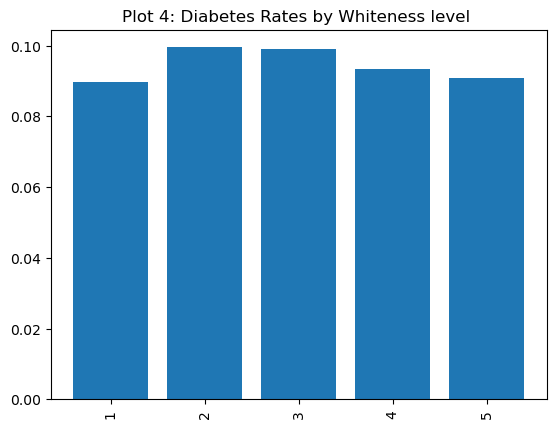

In [26]:
# clear figure
plt.clf()

# subset each column of the dataframe for plottinga
x = diabetes_race_means['Whiteness']
y = diabetes_race_means['Diabetes_Number']

# plot x and y
plt.bar(x, y)

# add title
plt.title('Plot 4: Diabetes Rates by Whiteness level ')

# add ticks on x axis and rotate 90 degrees
plt.xticks(x, x, rotation = 90)

# plot
plt.show()

In [27]:
diabetes_racecat.to_csv("diabetes_racecat_data_mod.csv", index=False)

The plots above present the scope of the problem of diabetes and one possible correlated demographic feature (race). 

**Plot 1**: This plot shows diabetes cases as a percentage of county populations across the country. The distribution is close to normal but slightly right-skewed, meaning that a there are some outlier counties with quite high diabetes populations. The average county has about a 8% incidence rate. 

**Plot 2**: Here we map diabetes incidence against the percent of the population who identify as white. This plot shows that while most counties are majority white, the outlier counties with the highest diabetes rates -- hovering near the top of the plot -- tend not to be. In other words, this plot shows a slight negative correlation between whiteness and diabetes incidence. 

**Plot 3**: On the X axis, we see a constructed whiteness score and on the y axis, county population. This bar plot simply illustrates the former point above: most counties are majority white.  

**Plot 4**: This plot maps the constructed whiteness score above onto the diabetes incidence counts. We see that there is some relationship between whiteness and lack of diabetes.

## 3. Prepare to Fit Models

### 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'Region' to be a categorical variable using `pd.get_dummies` and drop 'State'. Also, we'll drop 'County' because 'CountyFIPS' is already a unique identifier for the county. 



In [28]:
#what are the regions again
diabetes['Region'].value_counts()

Region
Midwest      1042
South         816
Southeast     567
West          443
Northeast     244
Name: count, dtype: int64

In [29]:
# Drop and get dummies
#-----------
diabetes_clean = diabetes.drop(labels = ['State', 'County'], axis = 1)

#check
diabetes_clean

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -

In [30]:
# create dummy features out of 'Region', which might be related to diabetes rates 
diabetes_clean = pd.get_dummies(data = diabetes_clean, 
                               columns = ["Region"],  
                               drop_first = True) # drop the first as a reference 
#check
diabetes_clean

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -

### 3.2 Partition Data, Feature Selection, and Standardization

Now, we will partition our data to prepare it for the training process. Ultimately we want to use a 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

Work through partitioning the data into the test/train/validation sets in the chunks below. Be sure to that if you are using Ridge or LASSO, you Standardize the data. Where you do this in the workflow matters so be clear about where you are doing this and why. 

In [31]:
#
# Partition data
#-----------

# import library
from sklearn.model_selection import train_test_split

# create y dataframe 
y = diabetes_clean["Diabetes_Number"]

# create X dataframe (include everything except "Diabetes_Number", our target, 
# and "race alone or in combination with one or more other races_total population")
X = diabetes_clean.drop(["Diabetes_Number",                   
                   "race alone or in combination with one or more other races_total population"],
                    axis= 1)

Investigate whether there are any features that you should remove prior to spliting and model fitting. You may also consider using plots and relationships you found in the EDA stage for this question. Be sure to justify your logic. 

<p style="font-size:16pt">Feature Selection
</p>

In [32]:
X.columns

Index(['CountyFIPS', 'Obesity_Number', 'Physical_Inactivity_Number',
       'sex and age_total population_65 years and over_sex ratio (males per 100 females)',
       'race_total population', 'race_total population_one race',
       'race_total population_two or more races',
       'race_total population_one race_white',
       'race_total population_one race_black or african american',
       'race_total population_one race_american indian and alaska native',
       'race_total population_one race_american indian and alaska native_cherokee tribal grouping',
       'race_total population_one race_american indian and alaska native_chippewa tribal grouping',
       'race_total population_one race_american indian and alaska native_navajo tribal grouping',
       'race_total population_one race_american indian and alaska native_sioux tribal grouping',
       'race_total population_one race_asian',
       'race_total population_one race_asian_asian indian',
       'race_total population_one

In [33]:
# # Feature selection
#: highly correlated columns
# Some race variables will have to go. Keeping the big five, PI, two+, and other. These add up to 1 for counties. Dropping everything else and white
X =  X.drop(['race_total population_one race',
                          'race_total population_two or more races',
                          'race_total population_one race',
                          'race_total population_one race_white',
                          'race_total population_one race_black or african american',
                          'race_total population_one race_american indian and alaska native',
                          'race_total population_one race_american indian and alaska native_cherokee tribal grouping',
                          'race_total population_one race_american indian and alaska native_chippewa tribal grouping',
                          'race_total population_one race_american indian and alaska native_navajo tribal grouping',
                          'race_total population_one race_american indian and alaska native_sioux tribal grouping',
                          'race_total population_one race_asian',
                          'race_total population_one race_asian_asian indian',
                          'race_total population_one race_asian_chinese',
                          'race_total population_one race_asian_filipino',
                          'race_total population_one race_asian_japanese',
                          'race_total population_one race_asian_korean',
                          'race_total population_one race_asian_vietnamese',
                          'race_total population_one race_asian_other asian',
                          'race_total population_one race_native hawaiian and other pacific islander',
                          'race_total population_one race_native hawaiian and other pacific islander_native hawaiian',
                          'race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro',
                          'race_total population_one race_native hawaiian and other pacific islander_samoan',
                          'race_total population_one race_native hawaiian and other pacific islander_other pacific islander',
                          'race_total population_one race_some other race',
                          'race_total population_two or more races',
                          'race_total population_two or more races_white and black or african american',
                          'race_total population_two or more races_white and american indian and alaska native',
                          'race_total population_two or more races_white and asian',
                          'race_total population_two or more races_black or african american and american indian and alaska native',
                          'race alone or in combination with one or more other races_total population_white',
                          'race alone or in combination with one or more other races_total population_black or african american',
                          'race alone or in combination with one or more other races_total population_american indian and alaska native',
                          'race alone or in combination with one or more other races_total population_asian',
                          'race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander',
                          'race alone or in combination with one or more other races_total population_some other race',
                          'hispanic or latino and race_total population_hispanic or latino (of any race)_mexican',
                          'hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican',
                          'hispanic or latino and race_total population_hispanic or latino (of any race)_cuban',
                          'hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino',
                          'hispanic or latino and race_total population_not hispanic or latino',
                          'hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race',
                          'hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -  and three or more races',
                          'sex and age_total population_male',
                          'sex and age_total population_female',
                          'sex and age_total population_under 18 years',
                          'sex and age_total population_16 years and over',
                          'sex and age_total population_18 years and over',
                          'sex and age_total population_21 years and over',
                          'sex and age_total population_62 years and over',
                          'sex and age_total population_65 years and over',
                          'sex and age_total population_18 years and over_male',
                          'sex and age_total population_18 years and over_female',
                          'sex and age_total population_18 years and over_sex ratio (males per 100 females)',
                          'sex and age_total population_65 years and over_male',
                          'sex and age_total population_65 years and over_female',
                          'sex and age_total population_65 years and over_sex ratio (males per 100 females)'], axis= 1)


In [34]:
#Now we have complete sets for race and age. dropping white and under 5 as reference categories
X =  X.drop(['hispanic or latino and race_total population_not hispanic or latino_white alone','sex and age_total population_under 5 years'], axis= 1)


In [35]:
X.dtypes

CountyFIPS                                                                                                               object
Obesity_Number                                                                                                          float64
Physical_Inactivity_Number                                                                                              float64
race_total population                                                                                                     int64
hispanic or latino and race_total population_hispanic or latino (of any race)                                           float64
hispanic or latino and race_total population_not hispanic or latino_black or african american alone                     float64
hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone             float64
hispanic or latino and race_total population_not hispanic or latino_asian alone                         

In [37]:
#checking for correlation among remaining variables
cm = X.corr()

# Threshold
max = 0.75

# Identify pairs of columns with correlation above the threshold
hc = cm[(cm > max)]
 
highcor_df = pd.DataFrame(hc)
# print(highcor_df)

#(exporting for legibility)
hc.to_csv("diabetes_highcor.csv", index=True)

hc

,CountyFIPS,Obesity_Number,Physical_Inactivity_Number,race_total population,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,total housing units,citizen - voting age population_citizen - 18 and over population,citizen - voting age population_citizen - 18 and over population_male,citizen - voting age population_citizen - 18 and over population_female,sex and age_total population_sex ratio (males per 100 females),sex and age_total population_5 to 9 years,sex and age_total population_10 to 14 years,sex and age_total population_15 to 19 years,sex and age_total population_20 to 24 years,sex and age_total population_25 to 34 years,sex and age_total population_35 to 44 years,sex and age_total population_45 to 54 years,sex and age_total population_55 to 59 years,sex and age_total population_60 to 64 years,sex and age_total population_65 to 74 years,sex and age_total population_75 to 84 years,sex and age_total population_85 years and over,sex and age_total population_median age (years),Region_Northeast,Region_South,Region_Southeast,Region_West
CountyFIPS,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obesity_Number,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Physical_Inactivity_Number,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race_total population,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hispanic or latino and race_total population_hispanic or latino (of any race),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hispanic or latino and race_total population_not hispanic or latino_black or african american alone,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hispanic or latino and race_total population_not hispanic or latino_asian alone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hispanic or latino and race_total population_not hispanic or latino_some other race alone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#getting rid of gender vars bc they are correlated with age vars (gender not given separate from age). other correlations are coincidental I think
#we can keep gender ratio vars though
X =  X.drop([ 'citizen -  voting age population_citizen -  18 and over population',
       'citizen -  voting age population_citizen -  18 and over population_male',
       'citizen -  voting age population_citizen -  18 and over population_female'], axis= 1)


In [39]:
#2 There don't appear to be many missing values. 
missing_values = X.isnull().sum() / len(X)
print(missing_values)

CountyFIPS                                                                                                              0.0
Obesity_Number                                                                                                          0.0
Physical_Inactivity_Number                                                                                              0.0
race_total population                                                                                                   0.0
hispanic or latino and race_total population_hispanic or latino (of any race)                                           0.0
hispanic or latino and race_total population_not hispanic or latino_black or african american alone                     0.0
hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone             0.0
hispanic or latino and race_total population_not hispanic or latino_asian alone                                         0.0
hispanic

In [40]:
#renaming for legibility
X.rename(columns={'hispanic or latino and race_total population_hispanic or latino (of any race)': 'Hispanic or Latino',
                  'hispanic or latino and race_total population_not hispanic or latino_black or african american alone': 'Black or African American',
                  'hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone':'American Indian or Alaskan Native',
                  'hispanic or latino and race_total population_not hispanic or latino_asian alone':'Asian',
                  'hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone':'Native Hawaiian or Other PI',
                  'hispanic or latino and race_total population_not hispanic or latino_some other race alone':'Some Other Race',
                  'hispanic or latino and race_total population_not hispanic or latino_two or more races':'Two or More Races'}, inplace=True)

# Training/test split

In [41]:
#-----------

# import library for training-testing-splitting
from sklearn.model_selection import train_test_split

# set the random seed
np.random.seed(10)


# split the data so that it returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,                 # specify training dataset
                                                    y,                 # specify test dataset
                                                    train_size=.8,      # specify proportional split for training
                                                    test_size=.2)       # specify proportional split for test

In [42]:
#
# Validation split
#-----------

# train_test_split returns 4 values: X_train, X_test, y_train, y_test, so how do we create a 60-20-20 train-validate-test split? 
X_train, X_validate, y_train, y_validate = train_test_split(X_train,
                                                            y_train,
                                                            train_size=.75, 
                                                            test_size=.25)

In [43]:
#
# Standardization
#-----------
# Given that we want to only standardize non-dichotomous variables, we need to find a 
# solution that will loop over only the columns we want to standardize. The code below
# identifies all non-dichotomous variables in our dataset and only standardizes those.

# load library and create instance of Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# identify non-dichotomous columns we want to transform
columns = list(X_test.select_dtypes(include=['number']).loc[:, X_test.nunique() > 2])

# use loop to transform training data for only columns we want to transform
for column in columns:
    X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1)).flatten()

# use loop to transform validation data for only columns we want to transform
for column in columns:
    X_validate[column] = scaler.fit_transform(X_validate[column].values.reshape(-1, 1)).flatten()

# use loop to transform test data for only columns we want to transform
for column in columns:
    X_test[column] = scaler.fit_transform(X_test[column].values.reshape(-1, 1)).flatten()

In [44]:
X

,CountyFIPS,Obesity_Number,Physical_Inactivity_Number,race_total population,Hispanic or Latino,Black or African American,American Indian or Alaskan Native,Asian,Native Hawaiian or Other PI,Some Other Race,Two or More Races,total housing units,sex and age_total population_sex ratio (males per 100 females),sex and age_total population_5 to 9 years,sex and age_total population_10 to 14 years,sex and age_total population_15 to 19 years,sex and age_total population_20 to 24 years,sex and age_total population_25 to 34 years,sex and age_total population_35 to 44 years,sex and age_total population_45 to 54 years,sex and age_total population_55 to 59 years,sex and age_total population_60 to 64 years,sex and age_total population_65 to 74 years,sex and age_total population_75 to 84 years,sex and age_total population_85 years and over,sex and age_total population_median age (years),Region_Northeast,Region_South,Region_Southeast,Region_West
0,01001,0.244366,0.226902,55200,0.027681,0.189764,0.002880,0.010290,0.000091,0.000743,0.018333,0.422373,94.9,0.072627,0.064674,0.069837,0.060453,0.127971,0.133587,0.142264,0.074837,0.048804,0.085344,0.045725,0.014764,37.8,False,False,True,False
1,01003,0.233255,0.192324,208107,0.044943,0.093841,0.006718,0.008015,0.000043,0.001970,0.014281,0.537920,94.6,0.056168,0.068825,0.061060,0.051848,0.112087,0.121942,0.136132,0.069387,0.071362,0.117973,0.058456,0.018976,42.8,False,False,True,False
2,01005,0.310643,0.210651,25782,0.042898,0.473160,0.002444,0.003297,0.000039,0.003336,0.013343,0.462997,113.3,0.056241,0.065045,0.055620,0.064308,0.142541,0.120394,0.133892,0.064270,0.064037,0.109379,0.053991,0.016368,39.9,False,False,True,False
3,01007,0.290052,0.258667,22527,0.024282,0.220802,0.000355,0.001642,0.000000,0.000000,0.007103,0.406668,117.1,0.052293,0.057220,0.067208,0.066187,0.136503,0.128512,0.152661,0.066320,0.053980,0.094198,0.049363,0.018955,39.9,False,False,True,False
4,01009,0.246804,0.249198,57645,0.091266,0.014225,0.002151,0.003435,0.000312,0.003018,0.014190,0.420193,97.3,0.063006,0.069303,0.064481,0.055321,0.117721,0.124087,0.137861,0.067569,0.062677,0.106375,0.056119,0.015023,40.8,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,56037,0.212208,0.170410,44117,0.159621,0.007616,0.010699,0.006324,0.004397,0.000249,0.015323,0.444908,107.8,0.080536,0.072602,0.071560,0.061564,0.148492,0.136501,0.119546,0.070018,0.060657,0.069384,0.027540,0.010087,34.6,False,False,False,True
3216,56039,0.088946,0.086951,23059,0.148879,0.010625,0.003339,0.012229,0.001518,0.000520,0.007025,0.593261,106.8,0.058979,0.058632,0.040331,0.047574,0.183833,0.161889,0.132313,0.064400,0.065961,0.090507,0.033132,0.012316,39.3,False,False,False,True
3217,56041,0.238973,0.170751,20609,0.091416,0.000970,0.007278,0.001067,0.000000,0.000000,0.023825,0.435344,104.0,0.088748,0.084769,0.071668,0.055267,0.119074,0.130914,0.113300,0.085497,0.056674,0.077879,0.029405,0.013926,35.5,False,False,False,True
3218,56043,0.213802,0.210112,8129,0.141838,0.000123,0.003567,0.000000,0.000000,0.001599,0.032845,0.475827,103.6,0.059540,0.069012,0.071349,0.050191,0.096322,0.121048,0.125600,0.071473,0.074671,0.118957,0.064953,0.023496,43.5,False,False,False,True


## 4. Train Models

In this section, train your models. 

**Note that if you use Lasso, you will likely need to specify a very low penalty (e.g., an alpha of 0.001) because of convergence problems.**

### 4.1 Describe models

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem.

**MODEL DESCRIPTION(S):** ...

### 4.2 Train models

Train each model in the training set, and be sure to tune hyperparameters if appropriate. Report any relevant summary statistics from the training set, including how well each model fits the training data.

#### Model 1: OLS 

In [45]:
X.to_csv("test.csv", index=False)

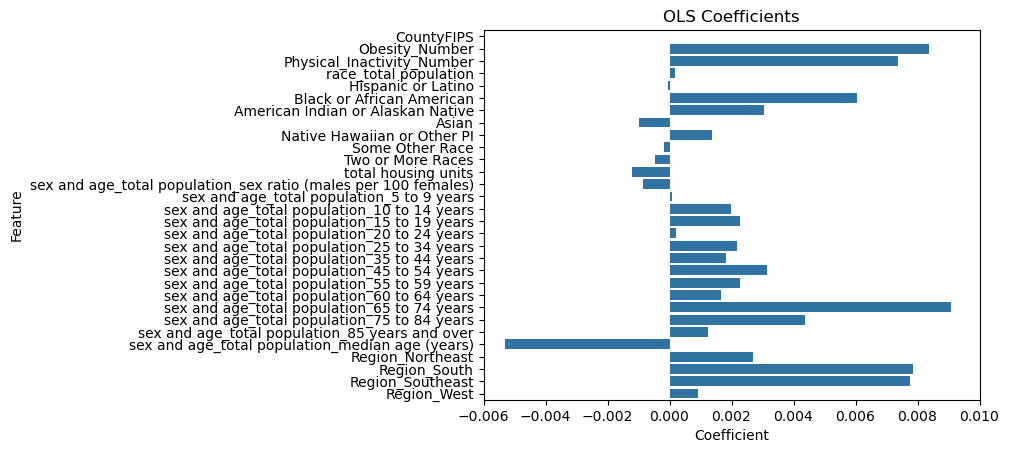

,Coefficient,Feature
0,-0.0,CountyFIPS
1,0.008371,Obesity_Number
2,0.00736,Physical_Inactivity_Number
3,0.000161,race_total population
4,-0.000051,Hispanic or Latino
5,0.00605,Black or African American
6,0.003045,American Indian or Alaskan Native
7,-0.000971,Asian
8,0.001364,Native Hawaiian or Other PI
9,-0.000168,Some Other Race


In [52]:
#
# Model 1 training
#starting with basic OLS
lin_reg = LinearRegression(fit_intercept = True)
lin_model = lin_reg.fit(X_train, y_train)

# taking a look
# dataframe
lin_reg_data = pd.DataFrame([lin_model.coef_, X.columns]).T 
lin_reg_data.columns = ['Coefficient', 'Feature']    
lin_reg_data
#plot
lin_reg_plot = sns.barplot(x="Coefficient",                           
                 y="Feature",                               
                 data=lin_reg_data)                         

lin_reg_plot.set_title("OLS Coefficients") 
plt.xlim(-.006,.01)
plt.show() 
#coefficients
lin_reg_data

In [58]:
#I guess median age would be negatively correlated with diabetes if in counties where people live longer there's less diabetes. fascinating.

#Hyperparameter tuning
param_grid = {'fit_intercept': [True, False]}          

# grid search
lin_grid_reg = GridSearchCV(estimator  = lin_reg,      
                            param_grid = param_grid,   
                            cv=3)                      

# fit the tuning
lin_grid_reg.fit(X_train, y_train)

# selection
best_index = np.argmax(lin_grid_reg.cv_results_["mean_test_score"])  
best_lin_pred = lin_grid_reg.best_estimator_.predict(X_validate)   

# Root mean squared error
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

# printing
print(lin_grid_reg.cv_results_["params"][best_index])
#print('Best CV R^2:', max(lin_grid_reg.cv_results_["mean_test_score"])) #didn't want to run this one
print('Validation R^2:', lin_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lin_pred, y_validate))

{'fit_intercept': True}
Validation R^2: 0.4540180159276619
Validation RMSE 0.019230583541938014


#### Model 2: Ridge 

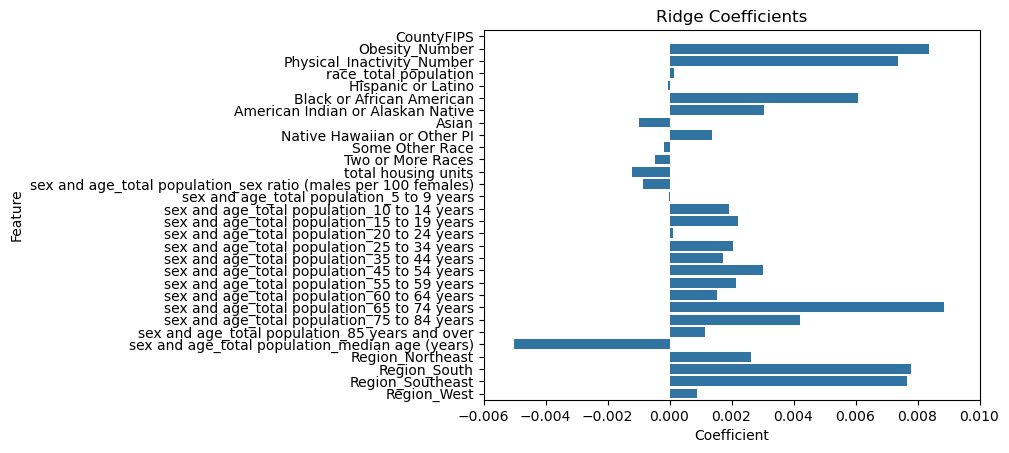

,Coefficient,Feature
0,-0.0,CountyFIPS
1,0.008363,Obesity_Number
2,0.007366,Physical_Inactivity_Number
3,0.000158,race_total population
4,-0.000046,Hispanic or Latino
5,0.006067,Black or African American
6,0.003043,American Indian or Alaskan Native
7,-0.000973,Asian
8,0.001362,Native Hawaiian or Other PI
9,-0.000165,Some Other Race


In [60]:
#
# Ridge training
ridge_reg = Ridge(alpha = 0.9, fit_intercept = True, solver = 'svd')                                           
ridge_model = ridge_reg.fit(X_train, y_train)                  

#dataframe
ridge_reg_data = pd.DataFrame([ridge_model.coef_, X.columns]).T  
ridge_reg_data.columns = ['Coefficient', 'Feature']    

ridge_reg_plot = sns.barplot(x="Coefficient",                           
                 y="Feature",                               
                 data=ridge_reg_data)                         

ridge_reg_plot.set_title("Ridge Coefficients") 
plt.xlim(-.006,.01)
plt.show()  

ridge_reg_data

In [61]:
# Ridge
# specify the hyperparameters; using the ones from class. 

param_grid = {'alpha': np.arange(.1, 1, .1),
              'fit_intercept': [True, False],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

# grid search...
ridge_grid_reg = GridSearchCV(ridge_reg,  # model to be tuned
                              param_grid, # parameters to be searched as specified above
                              cv=3)       # 3-fold cross-validation to be used during hypertuning

# fitting tuning to training
ridge_grid_reg.fit(X_train, y_train)

# selection
best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])  
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_validate)    
print(best_index)

# print results
print(ridge_grid_reg.cv_results_["params"][best_index])
#print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"])) 
print('Validation R^2:', ridge_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_ridge_pred, y_validate))

65
{'alpha': 0.9, 'fit_intercept': True, 'solver': 'svd'}
Validation R^2: 0.4543221511065787
Validation RMSE 0.01922522666949808


#### Model 3: LASSO

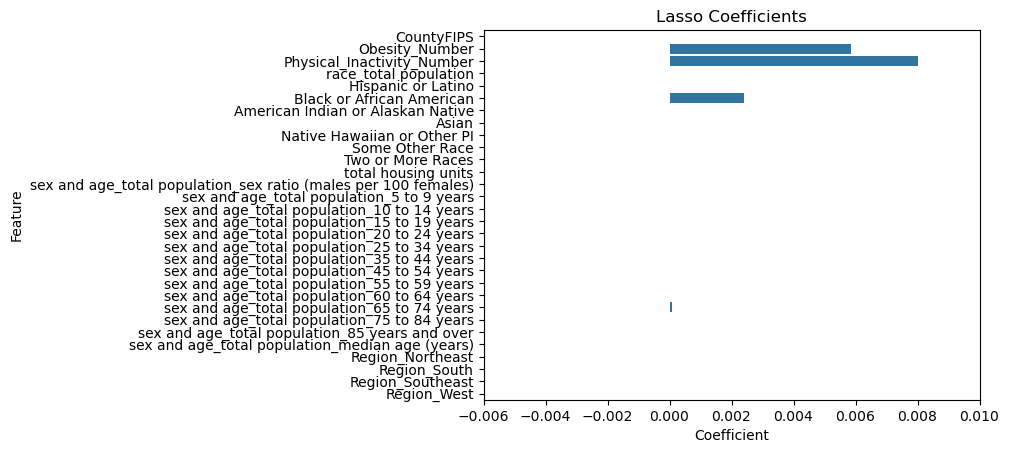

,Coefficient,Feature
0,-0.0,CountyFIPS
1,0.005852,Obesity_Number
2,0.00802,Physical_Inactivity_Number
3,-0.0,race_total population
4,-0.0,Hispanic or Latino
5,0.002416,Black or African American
6,0.0,American Indian or Alaskan Native
7,-0.0,Asian
8,-0.0,Native Hawaiian or Other PI
9,-0.0,Some Other Race


In [62]:
#
# LASSO
# create and fit the model
# in class we said that hyperparameter tuning will not converge with max_iter < 15000, don't know if that's always true.
lasso_reg = Lasso(max_iter=15000, alpha=0.005, fit_intercept= True, selection= 'cyclic')  
lasso_model = lasso_reg.fit(X_train, y_train)

#dataframe
lasso_reg_data = pd.DataFrame([lasso_model.coef_, X.columns]).T  # create a dataframe from the estimates
lasso_reg_data.columns = ['Coefficient', 'Feature'] 

#plot
lasso_reg_plot = sns.barplot(x="Coefficient",                           
                 y="Feature",                               
                 data=lasso_reg_data)                         

lasso_reg_plot.set_title("Lasso Coefficients") 
plt.xlim(-.006,.01)
plt.show()  

lasso_reg_data

In [64]:
#hyperparameter tuning
# LASSO 
#----------- 

# specify the hyperparameters; using the ones from class. 
param_grid = {'alpha': np.arange(.1, 1, .1),
              'fit_intercept': [True, False],
              'selection': ['cyclic', 'random']}

# grid search...
lasso_grid_reg = GridSearchCV(lasso_reg,  # model to be tuned
                              param_grid, # parameters to be searched as specified above
                              cv=3)       # 3-fold cross-validation to be used during hypertuning

# fitting tuning to training
lasso_grid_reg.fit(X_train, y_train)

# selection
best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])  
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)    
print(best_index)

# print results
print(lasso_grid_reg.cv_results_["params"][best_index])
#print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"])) #don't know why this didn't run...
print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lasso_pred, y_validate))

0
{'alpha': 0.1, 'fit_intercept': True, 'selection': 'cyclic'}
Validation R^2: 0.001292167120310883
Validation RMSE 0.026008932928432527


## 5. Validate and Refine Models

### 5.1 Predict on the validation set
Using each of the models you trained, predict outcomes in the validation set. Evaluate how well each model did.

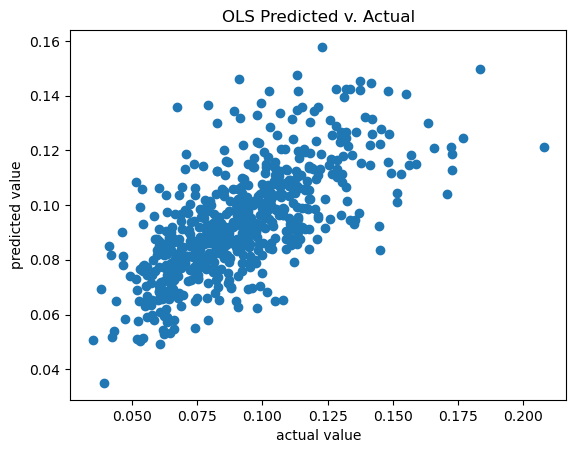

0.019230583541938014


In [65]:
#
# Predict on validation data
#Model 1: OLS
# saving results to lin_pred 
lin_pred = lin_model.predict(X_validate)

# plot the residuals on a scatter plot
plt.scatter(y_validate, lin_pred)                    
plt.title('OLS Predicted v. Actual')  
plt.xlabel('actual value')                           
plt.ylabel('predicted value')                        
plt.show()                                           


#RMSE
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))
print(rmse(lin_pred, y_validate))


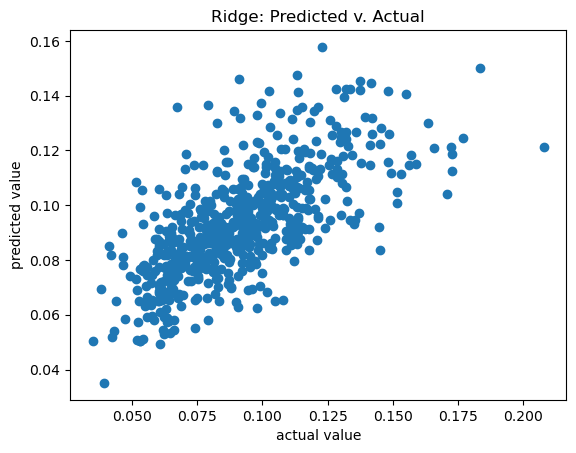

0.01922522666949808


In [66]:
#Model 2: Ridge

# saving results to lin_pred 
ridge_pred = ridge_model.predict(X_validate)

# plot the residuals on a scatter plot
plt.scatter(y_validate, ridge_pred)                    
plt.title('Ridge: Predicted v. Actual')  
plt.xlabel('actual value')                           
plt.ylabel('predicted value')                        
plt.show()                                           


#RMSE
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))
print(rmse(ridge_pred, y_validate))
#ridge is extremely similar


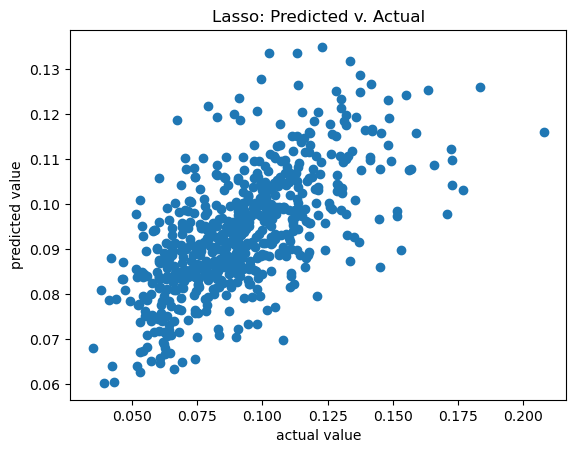

0.020326175205693988


In [67]:
#Model 3: LASSO

# saving results to lin_pred 
lasso_pred = lasso_model.predict(X_validate)

# plot the residuals on a scatter plot
plt.scatter(y_validate, lasso_pred)                    
plt.title('Lasso: Predicted v. Actual')  
plt.xlabel('actual value')                           
plt.ylabel('predicted value')                        
plt.show()                                           


#RMSE
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))
print(rmse(lasso_pred, y_validate))
#alpha: .0001 = 0.0191451801319309
#alpha: .001 = 0.019289187259795726
#alpha: .0005 = 0.019184803615697507
#alpha: .005 = 0.020326175205693988
#alpha: .01 = 0.02219169263522069 any bigger than this and the scatterplot starts to look really bad. 
#alpha: .05 = 0.026008682402102697
#alpha: .1 = 0.026008932928432527

### 5.2 Predict on the test set

Now, choose your best performing model of the three, select out unimportant feature(s), retrain the model, and then predict on the test set. 

#Predict using your best model

They are all very similar, but the LASSO has the highest RMSE. At the low low level of alpha, it really only points to three factors:  obesity, physical activity, and Black-identified.  Age is clearly important -- there's a tiny coefficient for 65-74 -- but I think it's getting
messed up as a real factor because counties with more older folks means people are living longer, and that plays against the 
theorizing around ill-health and poverty that are usually tied up with diabetes. https://diabetes.org/about-diabetes/statistics/about-diabetes 
Kind of surprised region isn't in here, given the "diabetes belt" 
that is the US SE. https://stacks.cdc.gov/view/cdc/46013  -->

In [79]:
# #dropping all but most important variables
X_train_reduced = X_train[['Physical_Inactivity_Number', 'Obesity_Number', 'Black or African American']]
X_validate_reduced = X_validate[['Physical_Inactivity_Number', 'Obesity_Number', 'Black or African American']]

In [70]:
#
# LASSO
lasso_reg = Lasso(max_iter=15000, alpha=0.005, fit_intercept= True, selection= 'cyclic')  
lasso_model = lasso_reg.fit(X_train, y_train)

### 5.3 Implement a cross-validation approach

Finally, implement a cross-validation approach for your best model and evaluate the results.

In [ ]:
#
# Run cross-validation
#-----------



## 6. Discussion Questions

In this section, insert responses for discussion questions here.

1. What is bias-variance tradeoff? Why is it relevant to machine learning problems like this one?

"Bias" refers to systematic errors that are created when a model tries to approximate real-world phenomena using a model that is too simple or just wrong; e.g. if the real-world relationship is non-linear, a linear model will create a lot of bias. "Variance" refers to the errors that are created when noisy data influences a model too much; unlike bias, where the model isn't precise or complex enough, variance means that the model is paying too much attention to the noise in the model and will perform poorly when confronted with a that dataset without the particular idiosyncracies it was trained on. The "trade-off" refers to the balance between the two.

In our diabetes context, both bias and variance will lead to inaccurate predictions. High bias will lead to a model that predicts outcomes badly, in both the training and test sets. As you correct bias by adjusting the model, it's possible to make the model so sensitive that it picks up idiosyncracies/variance of the training set. At that point, the model will work well with the training set but not the test set. Our model shouldn't be so simple that it ignores things like age, sex, and race; but it can't be so specific that it adjusts itself to the specific dataset that we have available for training. 

2. Define overfitting, and why it matters for machine learning. How can we address it?

As I said above, it is possible when training a model for it to become too specific, reacting not only to the semblance of real-world phenomena in the training data but also the idiosyncratic noise. The machine can't really tell what features are important always and which only appear important in the training data. Overfitting makes the model much less useful; an overfitted model will be less generalizable and will predict inaccurately.

Beyond simply making a model more simple, the things we've talked about in class to address overfitting are: 
1. Regularization (lasso and ridge methods, elastic net=combo). The idea here is to penalize a model systematically for being too complex.
2. Cross-validation (k-fold method). Here, you don't reserve a set of your data for testing, but rather train repeatedly on subsets and test repeatedly on remainders.
3. Ensemble methods (random forest, boosting and bagging). I don't understand these that well yet, but essentially you're combining models in ways to reduce errors. 

3. Discuss your analysis in 2-3 paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application – why or why not?

Which counties or regions would you prioritize for the pilot program? 

Would your answers change based on whether you want to take into account certain features such as race, gender, or age composition in the county? 

How confident would you be deploying this sort of model in a real-world application – why or why not?